In [24]:
import matplotlib.pyplot as plt
import glob
import numpy as np

In [49]:
paths_list = []
data_types = ['*image*image*',  '*points*image*', '*image*shape*', '*points*shape*']
num_subtrainsets = 0
for data_type in data_types:
    input_dm_paths = glob.glob(f"../eval/eval_results/checkpoints_input/*_train_{data_type}.npy")
    input_dm_paths.sort()
    paths_list.append(input_dm_paths)
    num_subtrainsets = len(input_dm_paths)

In [77]:
def find_cluster_size(path):
    size = path.split('_')[-4]
    return size

pred_paths_list = []
data_types = ['image_aug',  'shape_aug']
for data_type in data_types:
    pred_paths = glob.glob(f"../eval/eval_results/checkpoints_pred/*{data_type}*.npz")
    pred_paths.sort(key=find_cluster_size)
    pred_paths_list.append(pred_paths)

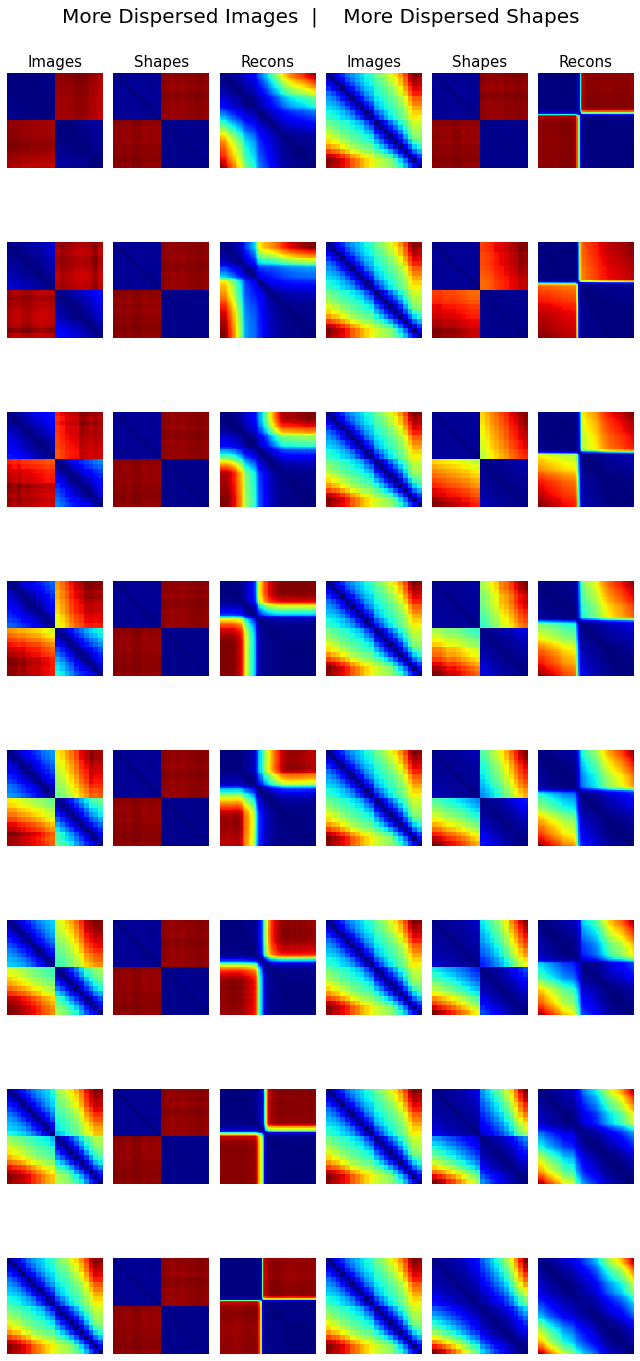

In [87]:
plt.figure(figsize=(9, 20))
row = 0
for path1, path2, path3, path4, path5, path6 in zip(paths_list[0], paths_list[1], pred_paths_list[0], paths_list[2], paths_list[3], pred_paths_list[1]):
    
    
    plt.subplot(num_subtrainsets, 6, row * 6 + 1)
    dm1 = np.load(path1)
    plt.imshow(dm1, interpolation='nearest', cmap=plt.cm.get_cmap("jet"))
    if row == 0:
        plt.title("Images", fontsize=15)
    plt.axis('off')
    
    
    plt.subplot(num_subtrainsets, 6, row * 6 + 2)
    dm2 = np.load(path2)
    plt.imshow(dm2, interpolation='nearest', cmap=plt.cm.get_cmap("jet"))
    if row == 0:
        plt.title("Shapes", fontsize=15)
    plt.axis('off')
    
    plt.subplot(num_subtrainsets, 6, row * 6 + 3)
    dm3 = np.load(path3, allow_pickle=True)['1'].item()['dm']
    plt.imshow(dm3, interpolation='nearest', cmap=plt.cm.get_cmap("jet"))
    if row == 0:
        plt.title("Recons", fontsize=15)
    plt.axis('off')
    
    plt.subplot(num_subtrainsets, 6, row * 6 + 4)
    dm4 = np.load(path4)
    plt.imshow(dm4, interpolation='nearest', cmap=plt.cm.get_cmap("jet"))
    if row == 0:
        plt.title("Images", fontsize=15)
    plt.axis('off')
    
    plt.subplot(num_subtrainsets, 6, row * 6 + 5)
    dm5 = np.load(path5)
    plt.imshow(dm5, interpolation='nearest', cmap=plt.cm.get_cmap("jet"))
    if row == 0:
        plt.title("Shapes", fontsize=15)
    plt.axis('off')
    
    plt.subplot(num_subtrainsets, 6, row * 6 + 6)
    dm6 = np.load(path6, allow_pickle=True)['1'].item()['dm']
    plt.imshow(dm6, interpolation='nearest', cmap=plt.cm.get_cmap("jet"))
    if row == 0:
        plt.title("Recons", fontsize=15)
    plt.axis('off')
    row += 1

plt.suptitle("More Dispersed Images  |    More Dispersed Shapes", fontsize=20)
plt.tight_layout()
plt.show()

In [117]:
paths_lists= []
data_types = ['*image*image*',  '*points*image*', '*image*shape*', '*points*shape*']
for data_type in data_types:
    input_ds_paths = glob.glob(f"../eval/eval_results/checkpoints_input/*_train_{data_type}.npz")
    input_ds_paths.sort()
    paths_lists.append(input_ds_paths)
paths_lists = [paths_lists[0], paths_lists[1], pred_paths_list[0], paths_lists[2], paths_lists[3], pred_paths_list[1]]

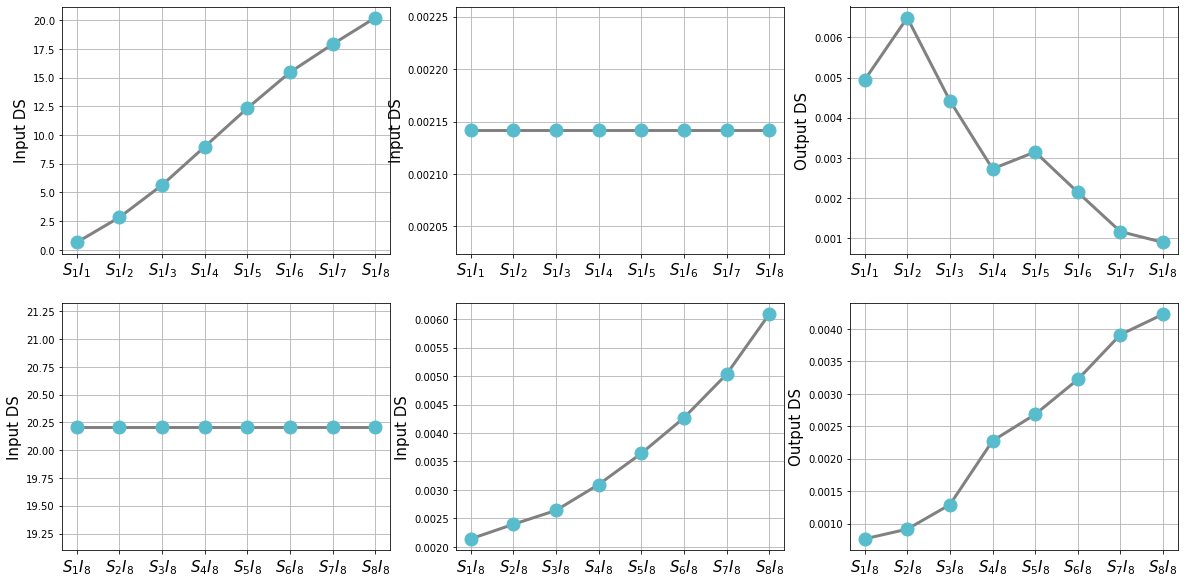

In [127]:
data_indexes_lessimg_ticks = [r'$S_{1}I_{1}$', r'$S_{1}I_{2}$', r'$S_{1}I_{3}$',r'$S_{1}I_{4}$',r'$S_{1}I_{5}$', r'$S_{1}I_{6}$',r'$S_{1}I_{7}$',r'$S_{1}I_{8}$', ]
data_indexes_moreshape_ticks = [r'$S_{1}I_{8}$',r'$S_{2}I_{8}$',r'$S_{3}I_{8}$',r'$S_{4}I_{8}$', r'$S_{5}I_{8}$', 
                            r'$S_{6}I_{8}$',r'$S_{7}I_{8}$',r'$S_{8}I_{8}$'] 

plt.figure(figsize=(20, 10))
linecolor = '#818181'
markercolor = '#59bccc'
fontsize = 20
linewidth = 3
markersize = 13

for idx, path_lst in enumerate(paths_lists):
    plt.subplot(2, 3, idx + 1)
    ds_lst = []
    for path in path_lst:
        ds_mean, ds_std = np.load(path, allow_pickle=True)['avg_KMedoids_Inertia_k2p0']
        ds_lst.append(ds_mean)
    plt.plot(range(len(ds_lst)), ds_lst, 'o-', c=linecolor, mec=markercolor, mfc=markercolor, linewidth=linewidth, markersize=markersize)
    data_indexes = range(len(ds_lst))
    if idx <= 2:
        plt.xticks(data_indexes, data_indexes_lessimg_ticks, fontsize=fontsize-5)
    else:
        plt.xticks(data_indexes, data_indexes_moreshape_ticks, fontsize=fontsize-5)
    if idx == 2 or idx == 5:
        plt.ylabel("Output DS", fontsize=fontsize-5)
    else:
        plt.ylabel("Input DS", fontsize=fontsize-5)
    
    plt.grid()
    plt.plot()